Github Link: [LINK](https://github.com/Kushal-ghimire/kushal_algerian_ff/blob/main/kushal.ipynb)

**Kushal** **Ghimire**

**C0903150**

**Linear_regression_Assignment**

In [29]:
# importing necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#loading dataset
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**Data Cleaning and Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.shape

(243, 15)

In [11]:
# checking for missing values
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


#There is no any null values

In [ ]:
df.value_counts('Classes')

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:

df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

It is clearly seen that some values have extra spaces . so its showing more classes. Lets remove spaces.

In [13]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [14]:
# change data to int
df[['month','day','year','Temperature','RH','Ws']]= df[['month','day','year','Temperature','RH','Ws']].astype(int)

# change other to float
objects=[feature for feature in df.columns if df[feature].dtype=='O']

for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)


df_copy=df.drop(['day','month','year'],axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [15]:
##Saving the cleaned dataset
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index=False)

EXploratory Data Analysis

In [22]:
dataframe=df.drop(['day','month','year'],axis=1)

In [23]:
dataframe.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
##categories in classes
dataframe['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [25]:
## encoding of the categories in classes
dataframe['Classes']=np.where(dataframe['Classes'].str.contains('not fire'),0,1)

In [26]:
dataframe.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [28]:
##categories in classes
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [32]:
# Create subplots with a number of rows and columns based on the DataFrame's columns
num_cols = len(df_copy.columns)
rows = (num_cols // 3) + 1 if num_cols % 3 != 0 else num_cols // 3
# Create subplot figure
fig = make_subplots(rows=rows, cols=3, subplot_titles=df_copy.columns)
# Plot histograms for each column
for i, col in enumerate(dataframe.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1
    fig.add_trace(go.Histogram(x=dataframe[col], nbinsx=50, name=col), row=row, col=col_num)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Histograms of dataframe Columns", showlegend=False)

# Show plot
fig.show()

<Axes: >

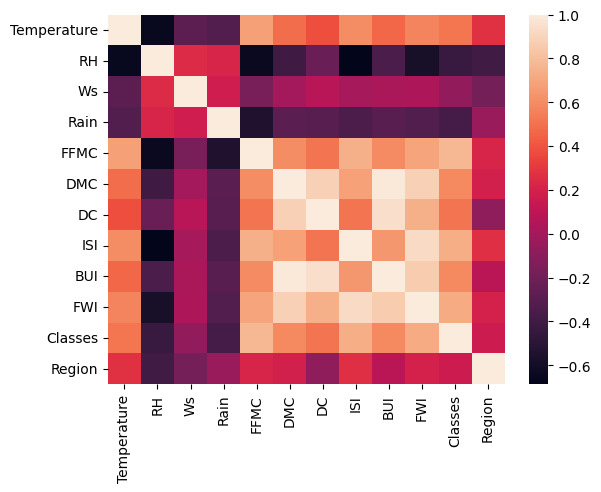

In [35]:
## correlation
dataframe.corr()
sns.heatmap(df_copy.corr())

In [36]:
# Create a box plot using Plotly
fig = go.Figure()

# Adding the box plot for 'FWI' with a specific color
fig.add_trace(go.Box(
    y=df_copy['FWI'],
    name='FWI',
    marker_color='green',
    boxmean=True  # This adds a mean marker to the box plot
))

# Customize layout
fig.update_layout(
    title="Distribution of FWI (Fire Weather Index)",
    yaxis_title='FWI',
    xaxis_title='',
    width=700,
    height=500,
    template='seaborn',  # Using 'seaborn' theme in Plotly
)

# Show the plot
fig.show()

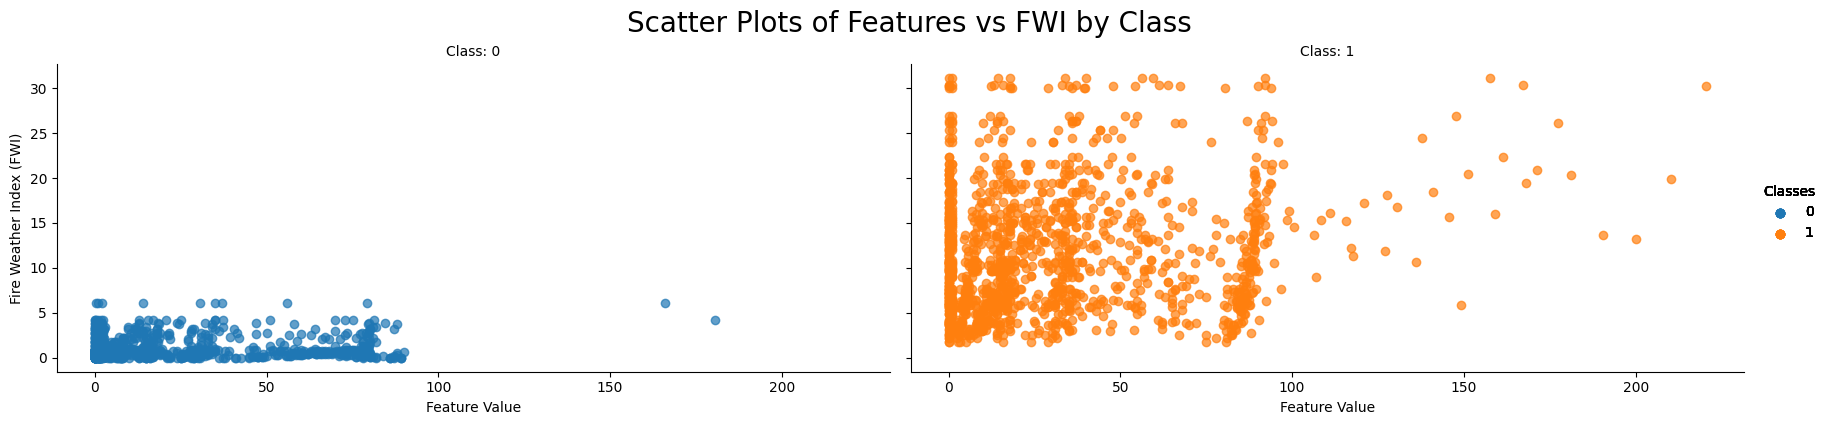

In [38]:
# Set up the FacetGrid for scatter plots
features = dataframe.columns.drop(['FWI', 'Classes'])  # Independent variables
num_features = len(features)

# Create a grid of scatter plots
g = sns.FacetGrid(dataframe, col='Classes', hue='Classes', palette=['#1f77b4', '#ff7f0e'], height=4, aspect=1.5)

# Map each feature to the scatter plot
for feature in features:
    g.map(plt.scatter, feature, 'FWI', alpha=0.7)  # Scatter plot for each feature vs FWI
    g.add_legend()  # Add legend for classes

# Set titles and labels
g.set_titles(col_template="Class: {col_name}")
g.set_axis_labels("Feature Value", "Fire Weather Index (FWI)")
g.fig.suptitle('Scatter Plots of Features vs FWI by Class', fontsize=20, y=1.05)
plt.show()

#Model Development and training

In [51]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
## encoding

df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [53]:
# let's divide independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [54]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [55]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [59]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((194, 14), (49, 14), (194,), (49,))

#Feature selection(Multicollinearity)

<Axes: >

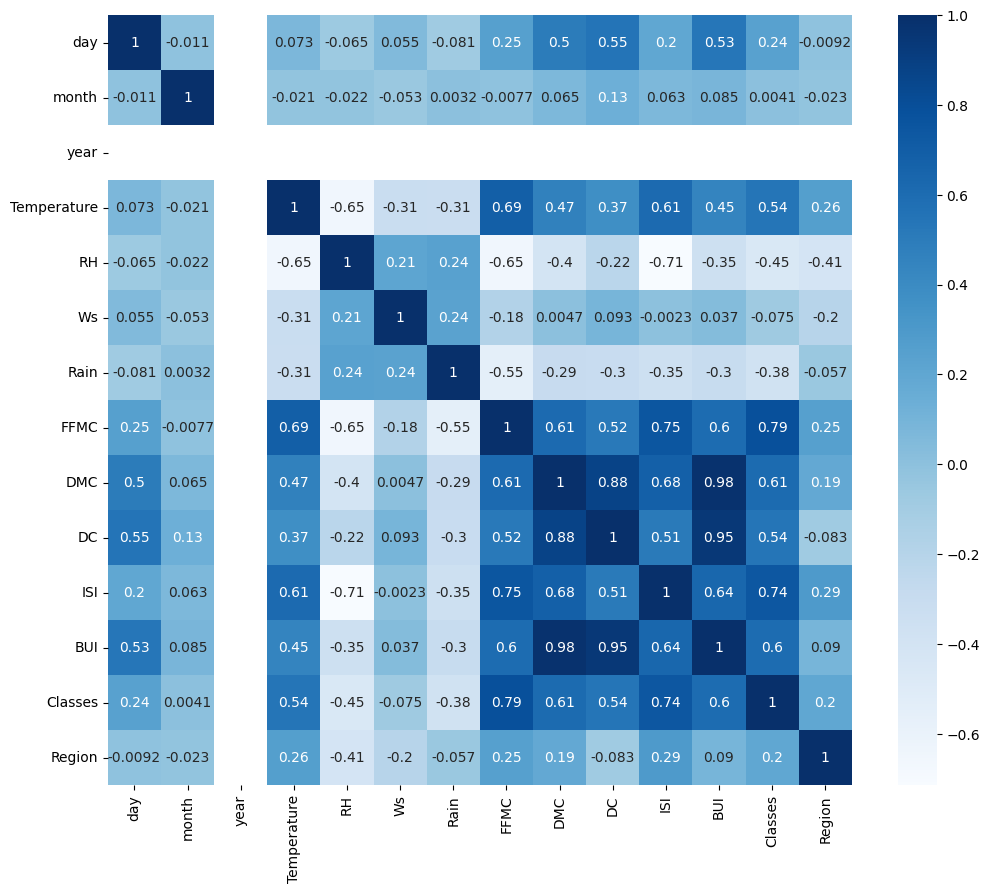

In [61]:
## check for multicollinearity (your independent feature should not be that correlated )
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap="Blues")

In [65]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
# here i set the threshold but normally domain expertise set the threshold value
cor_feature=correlation(X_train,0.8)
#drop feature when correlation is more than 0.8
X_train.drop(cor_feature,axis=1,inplace=True)
X_test.drop(cor_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 12), (49, 12))

#Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled


array([[ 0.91502056,  1.35966051,  0.        , ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 1.14086533,  0.45009451,  0.        , ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [-1.00465998, -0.45947148,  0.        , ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.68219429,  1.35966051,  0.        , ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 1.47963249, -0.45947148,  0.        , ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.55297044,  1.35966051,  0.        , ..., -0.88904223,
        -1.14434427, -1.01036297]])

#Model Evaluation and Testing
#Linear Regression Model

Mean Absolute Error 0.5392814181571722
R-squared score 0.9785210047261829


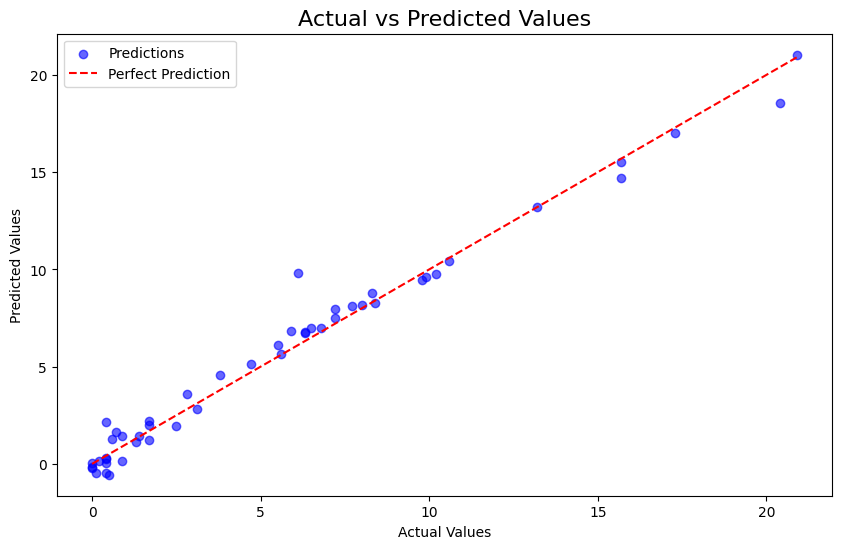

In [68]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R-squared score {score}")

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.show()


Mean Absolute Error: 1.0093958815851463
R-squared score: 0.9430507218123663


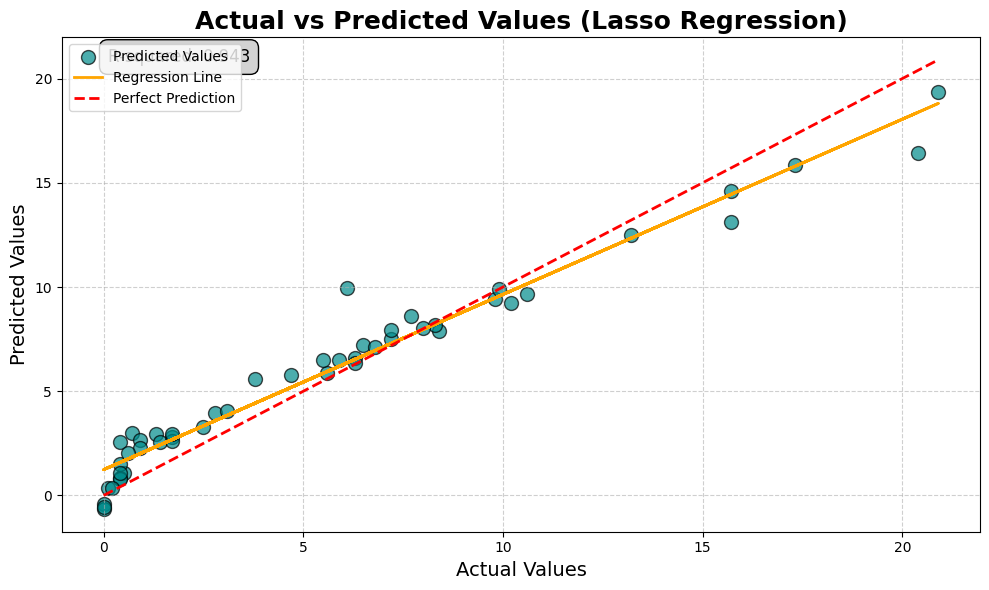

In [70]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# Calculate metrics
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {lasso_mae}")
print(f"R-squared score: {lasso_score}")

# Scatter Plot with Regression Line for Lasso Regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='darkcyan', alpha=0.7, edgecolor='black', s=100, marker='o', label='Predicted Values')

# Best fit line (regression line)
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='orange', linewidth=2, label='Regression Line')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add the R-squared value as a text box
plt.text(0.05, 0.95, f'R-squared: {lasso_score:.3f}', fontsize=12, color='black',
         bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'), transform=plt.gca().transAxes)

# Labels and title
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values (Lasso Regression)', fontsize=18, weight='bold')

# Grid, legend, and customization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


#Hyperparameter tuning with cross validation

In [71]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with 5-fold cross-validation
lasso_cv_model = LassoCV(cv=5, random_state=42)  # Added random_state for reproducibility

# Fit the model on the training data
lasso_cv_model.fit(X_train_scaled, y_train)

# Retrieve the best alpha value from cross-validation
best_alpha = lasso_cv_model.alpha_
print(f"Optimal alpha determined by LassoCV: {best_alpha:.4f}")

# Make predictions on the test set
y_pred_cv = lasso_cv_model.predict(X_test_scaled)

# Evaluate the model's performance
mae_cv = mean_absolute_error(y_test, y_pred_cv)
r2_cv_score = r2_score(y_test, y_pred_cv)

# Print performance metrics
print(f"Mean Absolute Error: {mae_cv:.4f}")
print(f"R-squared score: {r2_cv_score:.4f}")

Optimal alpha determined by LassoCV: 0.0310
Mean Absolute Error: 0.5590
R-squared score: 0.9780


#Ridge Regression

Mean Absolute Error 0.5537275379145196
R-squared score 0.9777997147400511


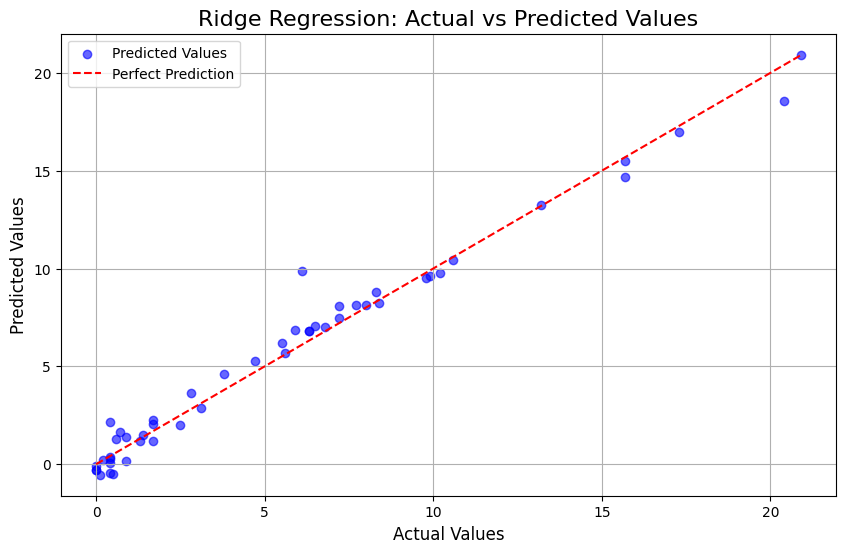

In [72]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {ridge_mae}")
print(f"R-squared score {ridge_score}")

import matplotlib.pyplot as plt

# Scatter Plot with Regression Line for Ridge Regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')

# Line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels, title, and legend
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Ridge Regression: Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid()

# Show the plot
plt.show()

#Saving Model

In [74]:
import pickle

# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the Linear Regression model
linreg_filename = 'linreg_model.pkl'
with open(linreg_filename, 'wb') as file:
    pickle.dump(linreg, file)

# Save the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'wb') as file:
    pickle.dump(lasso, file)

# Save the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'wb') as file:
    pickle.dump(ridge, file)


#Testing the model

In [86]:
# Load the scaler and models
with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

with open(linreg_filename, 'rb') as file:
    loaded_linreg = pickle.load(file)

with open(lasso_filename, 'rb') as file:
    loaded_lasso = pickle.load(file)

with open(ridge_filename, 'rb') as file:
    loaded_ridge = pickle.load(file)

data_dict = {'day': 11.0,
 'month': 9.0,
 'year': 2012.0,
 'Temperature': 30.0,
 'RH': 77.0,
 'Ws': 21.0,
 'Rain': 1.8,
 'FFMC': 58.5,
 'DMC': 1.9,
 'ISI': 1.1,
 'Classes': 0.0,
 'Region': 0.0}


new_data = pd.DataFrame([data_dict])

# Scale the new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with all models
linreg_pred = loaded_linreg.predict(new_data_scaled)
lasso_pred = loaded_lasso.predict(new_data_scaled)
ridge_pred = loaded_ridge.predict(new_data_scaled)

print(f"Linear Regression Prediction for FWI: {linreg_pred[0]}")
print(f"Lasso Regression Prediction for FWI: {lasso_pred[0]}")
print(f"Ridge Regression Prediction for FWI: {ridge_pred[0]}")

Linear Regression Prediction for FWI: 0.24289890398570968
Lasso Regression Prediction for FWI: 0.6532689729130867
Ridge Regression Prediction for FWI: 0.25996531146198887
